In [97]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Read CSV into DataFrame

In [98]:
df = pd.read_csv('c:/test_data/prophet_summed_dates.csv', header=None,
                 names=['date', 'gigabytes'], parse_dates=True, infer_datetime_format=True, 
                 memory_map=True)
df.head(5)

date   gigabytes
0  2015-05    1.306747
1  2015-06   34.215626
2  2015-07   36.932596
3  2015-08  276.924533
4  2015-09  846.051703

The contains a date and gigabytes column. The Prophet library expects as input a DataFrame with one column containing the time information, and another column containing the metric that we wish to forecast. Importantly, the time column is expected to be of the datetime type.

In [99]:
# Convert string to datetime type
df['date'] = pd.to_datetime(df['date'])

Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column)

In [125]:
df = df.rename(columns={'date': 'ds',
                        'gigabytes': 'y'})

df.head(5)

ds           y
0 2015-05-01    1.306747
1 2015-06-01   34.215626
2 2015-07-01   36.932596
3 2015-08-01  276.924533
4 2015-09-01  846.051703

Take a look at our data so far.

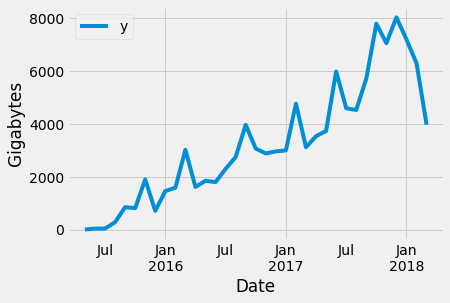

In [126]:
ax = df.set_index('ds').plot()
ax.set_ylabel('Gigabytes')
ax.set_xlabel('Date')

plt.show()

## Time-Series Forecasting

To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [127]:
# set the uncertainty interval to 95% 
my_model = Prophet(interval_width=.80).fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\n81737a\.venvs\worldpay.utils\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function

In [134]:
future_dates = my_model.make_future_dataframe(periods=12, freq='MS')
future_dates.tail()

ds
42 2018-11-01
43 2018-12-01
44 2019-01-01
45 2019-02-01
46 2019-03-01

When working with Prophet, it is important to consider the frequency the time series. 
Because we are working with monthly data, we specified the desired frequency of the timestamps (in this case, MS is the start of the month). 

The DataFrame of future dates is used as input to the predict method of our fitted model.

Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

ds: the datestamp of the forecasted value
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
yhat_lower: the lower bound of our forecasts
yhat_upper: the upper bound of our forecasts

In [135]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower    yhat_upper
42 2018-11-01  8832.764970  7744.147164   9807.802297
43 2018-12-01  8778.136458  7866.540948   9823.043262
44 2019-01-01  8783.062511  7830.461376   9726.443346
45 2019-02-01  9107.733567  8109.930452  10071.711983
46 2019-03-01  8186.385549  7194.715056   9155.955935

Prophet also provides a convenient function to quickly plot the results of our forecasts

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

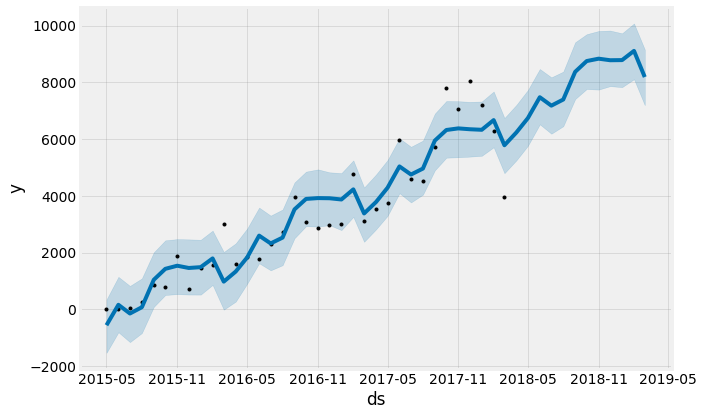

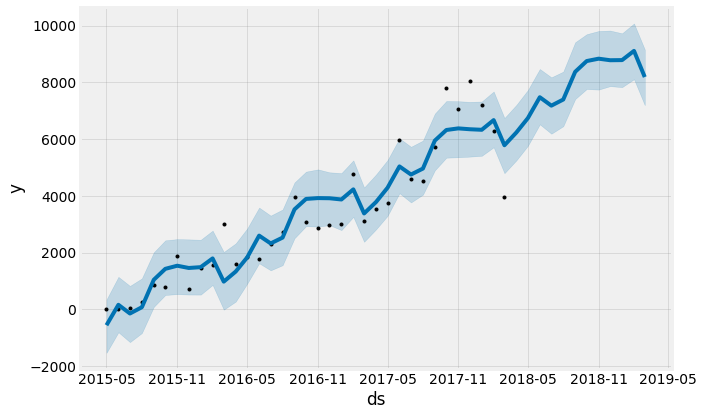

In [136]:
my_model.plot(forecast, uncertainty=True)

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values:

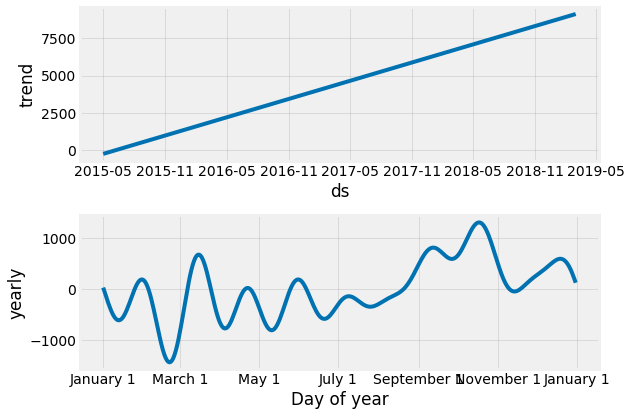

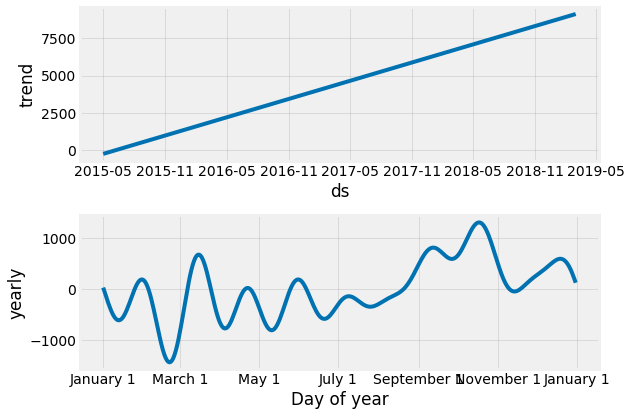

In [137]:
my_model.plot_components(forecast)